# SPGR

In [1]:
from multiprocessing import set_start_method
set_start_method('forkserver')

In [2]:
import version_control

Last run on cashlab03-deb at 2015-06-30 11:39:40.750567

Phypno Version: 2635b4cdcae67724eeec79333e23e1dad1b5585a

Babel==1.3, Cython==0.22.1, Jinja2==2.7.3, Markdown==2.6.2, MarkupSafe==0.23, Pillow==2.8.2, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.6, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==2015.04.28, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.5, ipython==3.2.0, jedi==0.9.0, jsonschema==2.5.1, matplotlib==1.4.3, memory-profiler==0.33, mistune==0.6, -e git+git@github.com:mne-tools/mne-python.git@7f8071891d7a8c2fdaa61ea3a8819394fcd86de2#egg=mne-origin/HEAD, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.3, nose==1.3.7, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.2, pandocfilters==1.2.4, pep8==1.6.2, pexpect==3.3, -e git+git@github.com:gpiantoni/phypno.git@2635b4cdcae67724eeec79333e23e1dad1b5585a#egg=phypno-master, pockets==0.2.4, psutil==3.0.1, ptyprocess==0.5, pycurl==7.19.5.1, pyflakes==0.9

In [3]:
from spgr import lg
from logging import INFO, DEBUG
lg.setLevel(INFO)

## Electrode Locations

### Locations for all the subjects

In [4]:
from phypno.attr import Freesurfer, Channels

from spgr.constants import (IMAGES_PATH,
                            REC_PATH,
                            FS_FOLDER,
                            HEMI_SUBJ, 
                            CHAN_TYPE, 
                            DATA_OPTIONS,
                            )
from spgr.read_data import get_chan_used_in_analysis

In [6]:
images_dir = IMAGES_PATH.joinpath('electrode_locations')
if not images_dir.exists():
    images_dir.mkdir(parents=True)

PLOT_COLOR = 'kw'

In [7]:
from phypno.viz import Viz3
from IPython.display import display
SKIN_COLOR = (239, 208, 207, 240)

INFO:spgr.read_data:MG37 analysis chan 78, with location 78


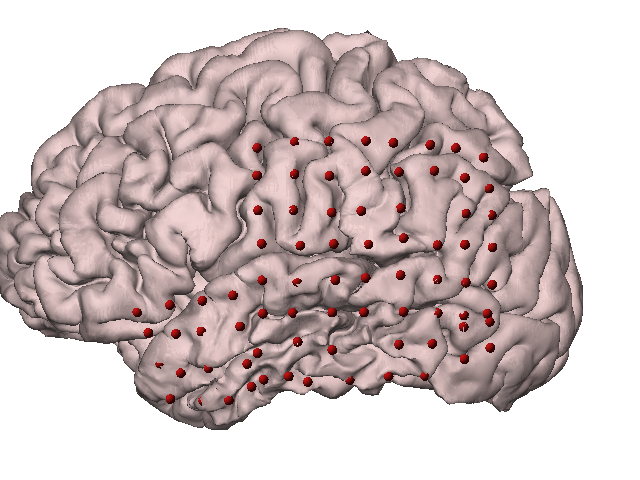

INFO:spgr.read_data:MG33 analysis chan 64, with location 64


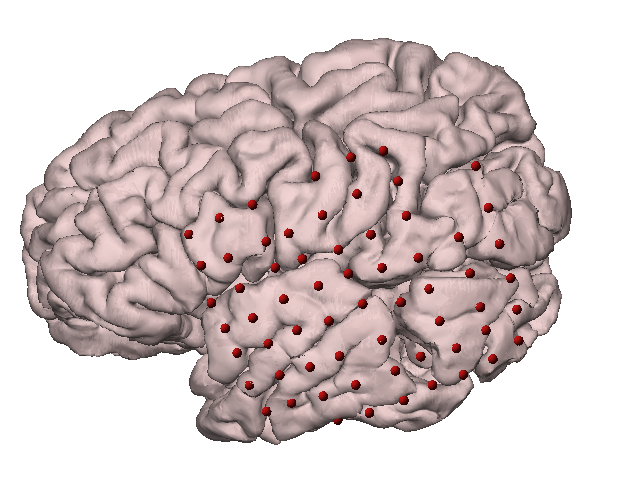

INFO:spgr.read_data:MG67 analysis chan 57, with location 57


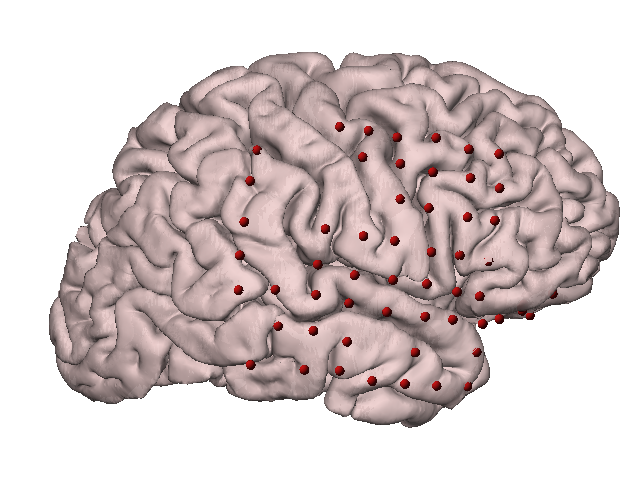

INFO:spgr.read_data:MG64 analysis chan 83, with location 83


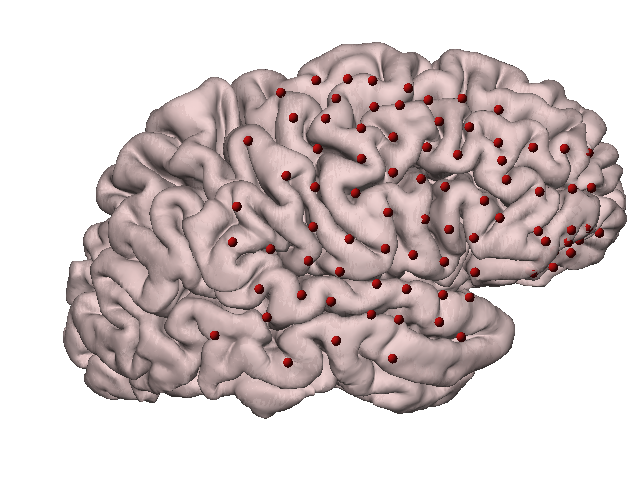

INFO:spgr.read_data:MG63 analysis chan 93, with location 93


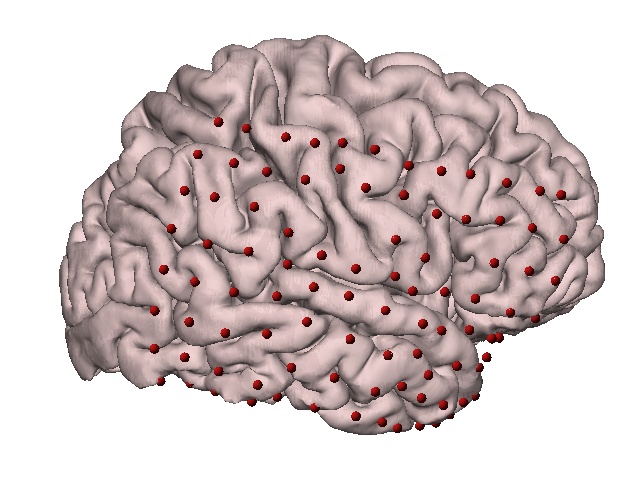

INFO:spgr.read_data:MG61 analysis chan 93, with location 93


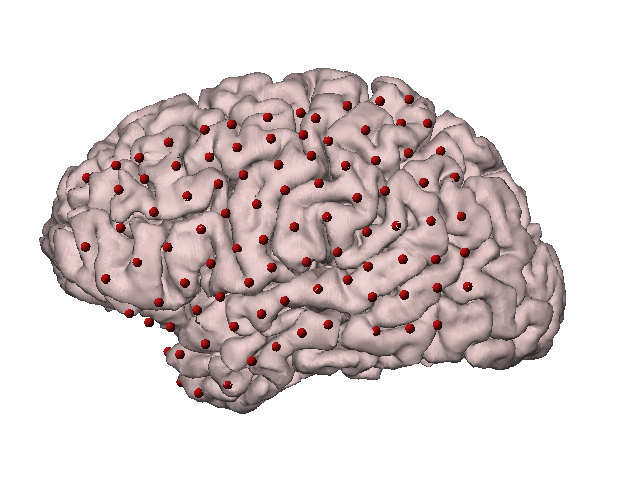

INFO:spgr.read_data:MG17 analysis chan 93, with location 93


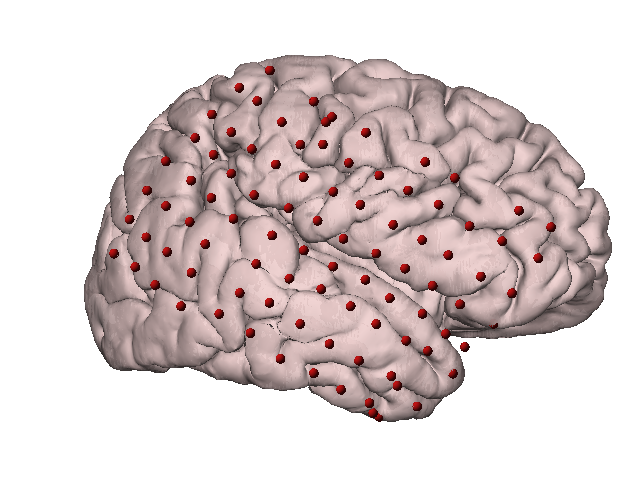

INFO:spgr.read_data:EM09 analysis chan 69, with location 69


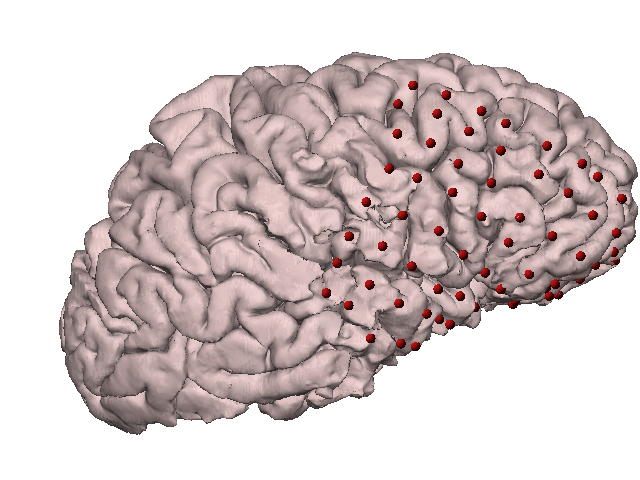

In [8]:
for subj, hemi in HEMI_SUBJ.items():
    chan = get_chan_used_in_analysis(subj, 'sleep', CHAN_TYPE, **DATA_OPTIONS)
    fs = Freesurfer(str(REC_PATH.joinpath(subj).joinpath(FS_FOLDER)))
    surf = getattr(fs.read_brain(), hemi)
    
    v = Viz3(color='kw')
    v.add_chan(chan, color=(200, 20, 20, 255))
    v.add_surf(surf, color=SKIN_COLOR)
    v.save(str(images_dir.joinpath(subj + '.png')))
    display(v)

## Coverage

In [9]:
from numpy import ones
from spgr.constants import HEMI_SUBJ, CHAN_TYPE, DATA_OPTIONS
from spgr.read_data import get_chan_used_in_analysis
from spgr.spindle_source import get_morph_linear, lg
from spgr.plot_spindles import plot_surf

INFO:spgr:Could not import LSF, running local jobs only


INFO:spgr.read_data:MG37 analysis chan 78, with location 78
INFO:spgr.spindle_source:Projecting values for MG37
INFO:spgr.read_data:MG37 analysis chan 78, with location 78
INFO:spgr.read_data:MG33 analysis chan 64, with location 64
INFO:spgr.spindle_source:Projecting values for MG33
INFO:spgr.read_data:MG33 analysis chan 64, with location 64
INFO:spgr.read_data:MG67 analysis chan 57, with location 57
INFO:spgr.spindle_source:Projecting values for MG67
INFO:spgr.read_data:MG67 analysis chan 57, with location 57
INFO:spgr.read_data:MG64 analysis chan 83, with location 83
INFO:spgr.spindle_source:Projecting values for MG64
INFO:spgr.read_data:MG64 analysis chan 83, with location 83
INFO:spgr.read_data:MG63 analysis chan 93, with location 93
INFO:spgr.spindle_source:Projecting values for MG63
INFO:spgr.read_data:MG63 analysis chan 93, with location 93
INFO:spgr.read_data:MG61 analysis chan 93, with location 93
INFO:spgr.spindle_source:Projecting values for MG61
INFO:spgr.read_data:MG61 ana

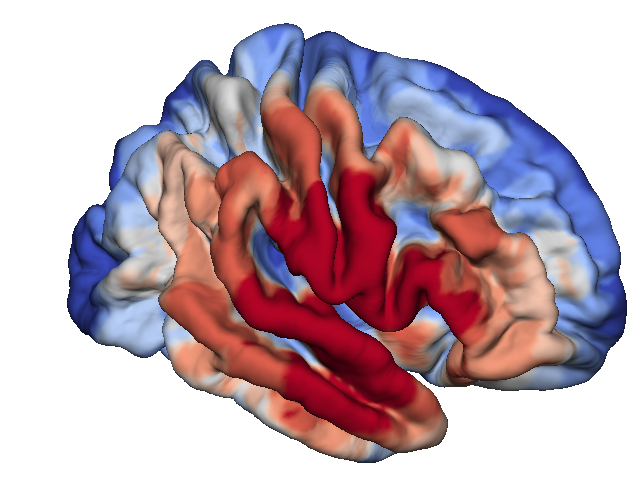

In [10]:
morphed = []

for subj in HEMI_SUBJ:

    # set channel values to 1
    chan = get_chan_used_in_analysis(subj, 'sleep', CHAN_TYPE, **DATA_OPTIONS)
    values = ones(chan.n_chan)
    
    morphed.append(get_morph_linear(subj, values, reref='avg'))
    
v = plot_surf(morphed, limits=(0, 1), extra_smoothing=False)
v.save(str(images_dir.joinpath('coverage_average.png')))
v